In [17]:
import os
import numpy as np
from keras.applications import EfficientNetB7
from keras.applications.efficientnet import preprocess_input
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Data directories
train_dir = '/content/drive/MyDrive/DR_50/Train'
test_dir = '/content/drive/MyDrive/DR_50/Test'

In [19]:
# EfficientNetB7
model_b7 = EfficientNetB7(weights='imagenet', include_top=False)

In [20]:
# Function to extract features from an image using EfficientNetB7
def extract_features_efficientnet_b7(img_path):
    img = image.load_img(img_path, target_size=(600, 600))  # Adjusted target size for EfficientNetB7
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model_b7.predict(img_data)
    return features

In [21]:
# Load images and extract features for B7
x_train_b7, y_train_b7 = [], []
x_test_b7, y_test_b7 = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet_b7(os.path.join(class_dir, img_path))
        x_train_b7.append(features)
        y_train_b7.append(i)

1/1 [==============================] - 3s 3s/step


In [22]:
# Load images and extract features for B7
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet_b7(os.path.join(class_dir, img_path))
        x_test_b7.append(features)
        y_test_b7.append(i)

1/1 [==============================] - 4s 4s/step


In [23]:
# Flatten the features for B7
x_train_flat_b7 = np.array([feature.flatten() for feature in x_train_b7])
x_test_flat_b7 = np.array([feature.flatten() for feature in x_test_b7])

In [24]:
# Scale the input features to the range [0, 1] for B7
scaler_b7 = MinMaxScaler()
x_train_scaled_b7 = scaler_b7.fit_transform(x_train_flat_b7)
x_test_scaled_b7 = scaler_b7.transform(x_test_flat_b7)

# Ensure non-negative values for B7
min_value_b7 = np.min(np.concatenate([x_train_scaled_b7, x_test_scaled_b7]))
x_train_scaled_non_negative_b7 = x_train_scaled_b7 - min_value_b7
x_test_scaled_non_negative_b7 = x_test_scaled_b7 - min_value_b7

Training Random Forest (max_features='sqrt') for EfficientNetB7...
Performance metrics for Random Forest (max_features='sqrt') with EfficientNetB7:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0



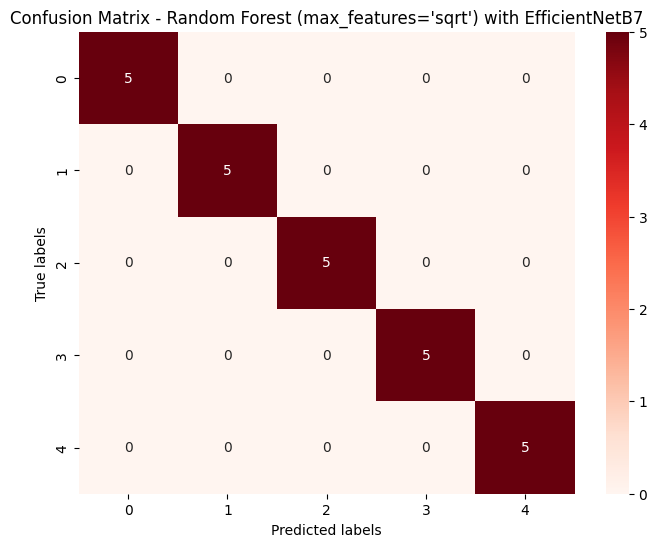

Training Random Forest (max_features='auto') for EfficientNetB7...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Performance metrics for Random Forest (max_features='auto') with EfficientNetB7:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0



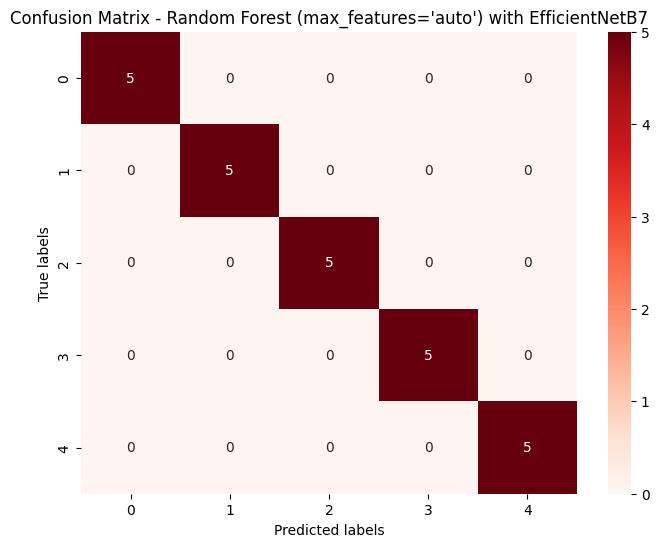

Training Random Forest (max_features='log2') for EfficientNetB7...
Performance metrics for Random Forest (max_features='log2') with EfficientNetB7:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0



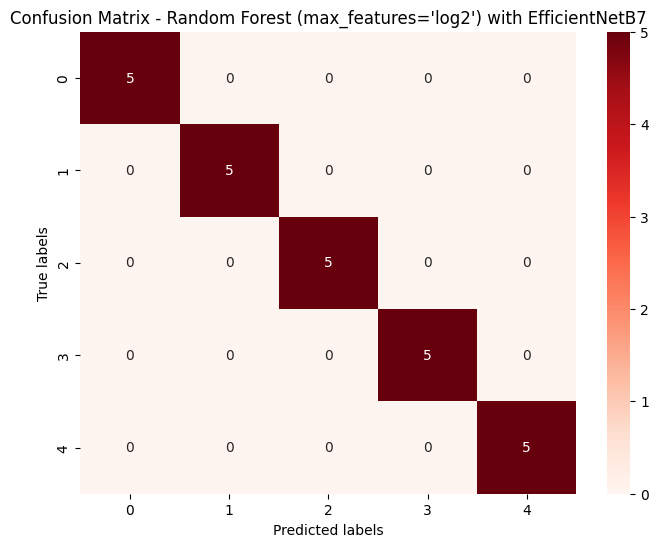

In [31]:
# Define Random Forest classifiers
classifiers_rf = {
    "Random Forest (max_features='sqrt')": RandomForestClassifier(max_depth=15, n_estimators=150, max_features='sqrt', bootstrap=True, random_state=42),
    "Random Forest (max_features='auto')": RandomForestClassifier(max_depth=15, n_estimators=150, max_features='auto', bootstrap=True, random_state=42),
    "Random Forest (max_features='log2')": RandomForestClassifier(max_depth=15, n_estimators=150, max_features='log2', bootstrap=True, random_state=42),
}

# Train Random Forest classifiers
for clf_name, clf_rf in classifiers_rf.items():
    print(f"Training {clf_name} for EfficientNetB7...")
    # Train classifier
    clf_rf.fit(x_train_scaled_non_negative_b7, y_train_b7)
    # Predict on test set
    y_pred_rf = clf_rf.predict(x_test_scaled_non_negative_b7)
    # Print performance metrics for Random Forest
    print(f'Performance metrics for {clf_name} with EfficientNetB7:')
    print('Classification Report:')
    print(classification_report(y_test_b7, y_pred_rf))
    # Additional performance metrics
    accuracy_rf = metrics.accuracy_score(y_test_b7, y_pred_rf)
    sensitivity_rf = metrics.recall_score(y_test_b7, y_pred_rf, average='macro')
    precision_rf = metrics.precision_score(y_test_b7, y_pred_rf, average='macro')
    f1_rf = metrics.f1_score(y_test_b7, y_pred_rf, average='macro')
    print(f'Accuracy: {accuracy_rf}')
    print(f'Sensitivity: {sensitivity_rf}')
    print(f'Precision: {precision_rf}')
    print(f'F1 Score: {f1_rf}\n')
    # Plot confusion matrix
    cm_rf = confusion_matrix(y_test_b7, y_pred_rf)
    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_rf, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with EfficientNetB7')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
